# Description
This notebook shows the effects of different post-translational modifications (PTMs) on predicted productivities

In [2]:
# Load important packages
import os
import numpy as np
import pandas as pd
from Bio import ExPASy, SwissProt
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
os.chdir(os.getcwd())
import scipy.stats as sc
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Note
The specific productivities were computed using the Matlab scripts and models in the "COMPUTATION OF PROTEOME COSTS" folder

In [2]:
data = pd.read_excel('NB3_DataFigure2C.xlsx',sheetname=0)

In [3]:
data
# Note that Max_qp and PCD columns correspond to those predictions made in the paper
# That is, using nutrient uptake rates from from Selvarasu et al. (see Supplementary File 3)

,Entry,Protein names,Length,Mass,SP,DSB,GPI,NG,OG,TMD,Location,Sequence,Max_qp_SELVARASU,PCD_SELVARASU,Max_qp_KALLEHAUGE,PCD_KALLEHAUGE,Max_qp_MARTINEZ,PCD_MARTINEZ
0,A0A075B6H9,Immunoglobulin lambda variable 4-69,119,12773,1,1,0,0,0,0,[e],MAWTPLLFLTLLLHCTGSLSQLVLTQSPSASASLGASVKLTCTLSS...,0.000642,89.710800,0.000687,96.087341,0.000557,77.897498
1,A0A075B6I0,Immunoglobulin lambda variable 8-61,122,12814,1,1,0,0,0,0,[e],MSVPTMAWMMLLLGLLAYGSGVDSQTVVTQEPSFSVSPGGTVTLTC...,0.000566,79.305199,0.000706,98.946514,0.000405,56.759499
2,A0A075B6I1,Immunoglobulin lambda variable 4-60,120,12987,1,1,0,0,0,0,[e],MAWTPLLLLFPLLLHCTGSLSQPVLTQSSSASASLGSSVKLTCTLS...,0.000642,91.213823,0.000687,97.697197,0.000557,79.202600
3,A0A075B6I4,Immunoglobulin lambda variable 10-54,117,12395,1,1,0,0,0,0,[e],MPWALLLLTLLTHSAVSVVQAGLTQPPSVSKGLRQTATLTCTGNSN...,0.000642,87.055928,0.001063,144.174003,0.000526,71.374605
4,A0A075B6I9,Immunoglobulin lambda variable 7-46,117,12468,1,1,0,0,0,0,[e],MAWTPLFLFLLTCCPGSNSQAVVTQEPSLTVSPGGTVTLTCGSSTG...,0.000566,77.163823,0.000706,96.274788,0.000405,55.226895
5,A0A075B6J1,Immunoglobulin lambda variable 5-37,123,13277,1,1,0,0,0,0,[e],MAWTPLLLLLLSHCTGSLSQPVLTQPPSSSASPGESARLTCTLPSD...,0.000685,99.467338,0.000706,102.521685,0.000557,80.971195
6,A0A075B6J6,Immunoglobulin lambda variable 3-22,115,12549,1,1,0,0,0,0,[e],MAWATLLLPLLNLYTGSVASYELTQLPSVSVSPGQTARITCSGDVL...,0.000668,91.786060,0.000784,107.666945,0.000478,65.692172
7,A0A075B6J9,Immunoglobulin lambda variable 2-18,118,12412,1,1,0,0,0,0,[e],MAWALLLLTLLTQGTGSWAQSALTQPPSVSGSPGQSVTISCTGTSS...,0.000613,83.218679,0.000882,119.802963,0.000438,59.560414
8,A0A075B6K0,Immunoglobulin lambda variable 3-16,115,12466,1,1,0,0,0,0,[e],MAWIPLLLPLLTLCTGSEASYELTQPPSVSVSLGQMARITCSGEAL...,0.000856,116.739459,0.000687,93.777875,0.000592,80.768325
9,A0A075B6K2,Immunoglobulin lambda variable 3-12,115,12387,1,1,0,0,0,0,[e],MAWTPLLLSLLAHCTGSATSYELTQPHSVSVATAQMARITCGGNNI...,0.000713,96.712434,0.000840,113.847571,0.000557,75.543436


In [4]:
uptakes = pd.read_excel('NB3_DataFigure2C.xlsx',sheetname=1,skip_footer=6)
uptakes

,REACTION,SELVARASU,KALLEHAUGE,MARTINEZ
0,EX_ala_L_e_,0.01070,0.104909,0.04160
1,EX_arg_L_e_,-0.01980,-0.011560,-0.00877
2,EX_asn_L_e_,-0.04040,-0.143343,-0.06930
3,EX_asp_L_e_,-0.00934,0.010530,0.00215
4,EX_cys_L_e_,-0.00522,-0.013128,0.00000
5,EX_gln_L_e_,-0.06700,-0.152446,-0.05180
6,EX_glu_L_e_,0.00000,0.049778,0.00227
7,EX_gly_e_,0.00000,0.066417,0.02220
8,EX_his_L_e_,-0.00330,-0.009242,-0.00376
9,EX_ile_L_e_,-0.01020,-0.026933,-0.01030


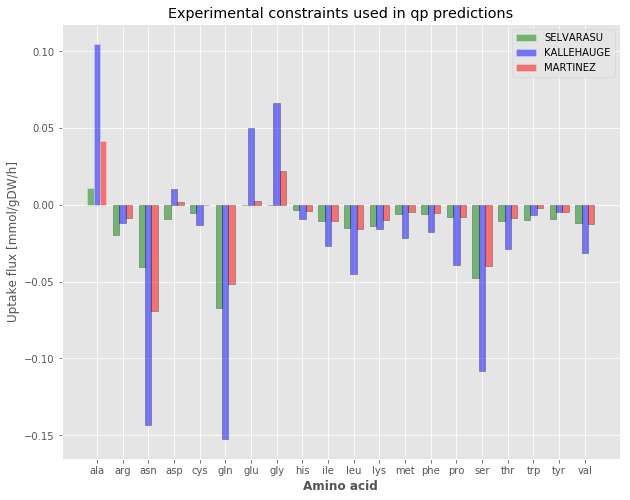

In [24]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = list(uptakes['SELVARASU'])
bars2 = list(uptakes['KALLEHAUGE'])
bars3 = list(uptakes['MARTINEZ'])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
#plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
#plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
plt.figure(figsize=(10,8))
aas = [s.replace('EX_','').replace('_e_','').replace('_L','') for s in list(uptakes['REACTION'])]
plt.bar(r1,uptakes['SELVARASU'],color='green', width=barWidth, edgecolor='white',alpha=0.5,label='SELVARASU')
plt.bar(r2,uptakes['KALLEHAUGE'],color='blue', width=barWidth, edgecolor='white',alpha=0.5,label='KALLEHAUGE')
plt.bar(r3,uptakes['MARTINEZ'],color='red', width=barWidth, edgecolor='white',alpha=0.5,label='MARTINEZ')

# Add xticks on the middle of the group bars
plt.xlabel('Amino acid', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], aas)
plt.title('Experimental constraints used in qp predictions')
plt.ylabel('Uptake flux [mmol/gDW/h]')
plt.legend(loc='best')
plt.savefig('Fig2C-2ndSubmission.pdf')

# Visualize effect of PTMs on qp across the three conditions

In [18]:
dataS = pd.read_excel('NB3_FBAresultsToyProteins2.xlsx',sheetname=1)
dataK = pd.read_excel('NB3_FBAresultsToyProteins2.xlsx',sheetname=2)
dataM = pd.read_excel('NB3_FBAresultsToyProteins2.xlsx',sheetname=3)

In [19]:
cols = ['DSB', 'NG', 'OG', 'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
def getRows(PTM):
    if PTM in ['DSB','NG','OG']:
        return [0] + [i for i in range(len(dataS)) if ' '  + PTM in str(dataS['DESCRIPTION'][i])]
    else:
        return [0] + [i for i in range(len(dataS)) if '0% ' + PTM in str(dataS['DESCRIPTION'][i])]

In [28]:
Deltas = []
avgDeltas = []
for i in range(len(cols)):
    rows = getRows(cols[i])
    x = np.array(dataS['QP'][rows])
    x = np.round(x,7)
    for r in range(1,len(rows)):
        delta = np.round(x[r]/x[0]-1,2)
        Deltas.append(delta)
    avgDeltas.append(np.mean(Deltas))
bars1 = np.array(avgDeltas)

Deltas = []
avgDeltas = []
for i in range(len(cols)):
    rows = getRows(cols[i])
    x = np.array(dataK['QP'][rows])
    x = np.round(x,7)
    for r in range(1,len(rows)):
        delta = np.round(x[r]/x[0]-1,2)
        Deltas.append(delta)
    avgDeltas.append(np.mean(Deltas))
bars2 = np.array(avgDeltas)

Deltas = []
avgDeltas = []
for i in range(len(cols)):
    rows = getRows(cols[i])
    x = np.array(dataM['QP'][rows])
    x = np.round(x,7)
    for r in range(1,len(rows)):
        delta = np.round(x[r]/x[0]-1,2)
        Deltas.append(delta)
    avgDeltas.append(np.mean(Deltas))
bars3 = np.array(avgDeltas)

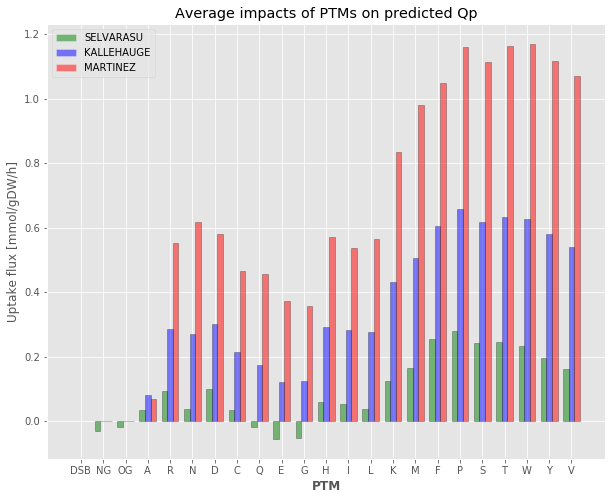

In [32]:
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
#plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
#plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
plt.figure(figsize=(10,8))
plt.bar(r1,bars1,color='green',width=barWidth, edgecolor='white',alpha=0.5,label='SELVARASU')
plt.bar(r2,bars2,color='blue',width=barWidth, edgecolor='white',alpha=0.5,label='KALLEHAUGE')
plt.bar(r3,bars3,color='red',width=barWidth, edgecolor='white',alpha=0.5,label='MARTINEZ')

# Add xticks on the middle of the group bars
plt.xlabel('PTM', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], cols)
plt.title('Average impacts of PTMs on predicted Qp')
plt.ylabel('Uptake flux [mmol/gDW/h]')
plt.legend(loc='best')
plt.savefig('Fig2D-2ndSubmission.pdf')

In [56]:
# Compute amino acid fractions
aas = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
for aa in aas:
    composition = [float(s.count(aa))/float(len(s)) for s in list(data['Sequence'])]
    data[aa] = composition
data

,Entry,Protein names,Length,Mass,SP,DSB,GPI,NG,OG,TMD,...,M,N,P,Q,R,S,T,V,W,Y
0,A0A075B6H9,Immunoglobulin lambda variable 4-69,119,12773,1,1,0,0,0,0,...,0.016807,0.008403,0.042017,0.058824,0.025210,0.176471,0.075630,0.016807,0.025210,0.042017
1,A0A075B6I0,Immunoglobulin lambda variable 8-61,122,12814,1,1,0,0,0,0,...,0.040984,0.016393,0.057377,0.049180,0.024590,0.155738,0.106557,0.073770,0.016393,0.065574
2,A0A075B6I1,Immunoglobulin lambda variable 4-60,120,12987,1,1,0,0,0,0,...,0.016667,0.025000,0.050000,0.050000,0.025000,0.183333,0.066667,0.025000,0.025000,0.050000
3,A0A075B6I4,Immunoglobulin lambda variable 10-54,117,12395,1,1,0,0,0,0,...,0.008547,0.059829,0.059829,0.068376,0.042735,0.136752,0.085470,0.042735,0.017094,0.025641
4,A0A075B6I9,Immunoglobulin lambda variable 7-46,117,12468,1,1,0,0,0,0,...,0.008547,0.017094,0.076923,0.051282,0.025641,0.111111,0.111111,0.042735,0.025641,0.051282
5,A0A075B6J1,Immunoglobulin lambda variable 5-37,123,13277,1,1,0,0,0,0,...,0.016260,0.032520,0.089431,0.048780,0.024390,0.178862,0.048780,0.024390,0.024390,0.073171
6,A0A075B6J6,Immunoglobulin lambda variable 3-22,115,12549,1,1,0,0,0,0,...,0.008696,0.034783,0.069565,0.043478,0.034783,0.113043,0.095652,0.052174,0.017391,0.069565
7,A0A075B6J9,Immunoglobulin lambda variable 2-18,118,12412,1,1,0,0,0,0,...,0.016949,0.025424,0.067797,0.059322,0.025424,0.186441,0.101695,0.050847,0.025424,0.050847
8,A0A075B6K0,Immunoglobulin lambda variable 3-16,115,12466,1,1,0,0,0,0,...,0.017391,0.000000,0.078261,0.052174,0.026087,0.139130,0.069565,0.052174,0.017391,0.069565
9,A0A075B6K2,Immunoglobulin lambda variable 3-12,115,12387,1,1,0,0,0,0,...,0.017391,0.043478,0.060870,0.052174,0.034783,0.130435,0.078261,0.052174,0.026087,0.043478


In [57]:
print list(data.columns)

[u'Entry', u'Protein names', u'Length', u'Mass', u'SP', u'DSB', u'GPI', u'NG', u'OG', u'TMD', u'Location', u'Sequence', u'Max_qp', u'PCD', u'Max_qp_KALLEHAUGE', u'PCD_KALLEHAUGE', u'Max_qp_MARTINEZ', u'PCD_MARTINEZ', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


# AppendixB: Create toy proteins to test how amino acid composition and PTMs affects productivity across different media compositions

#### TOY PROTEINS  (See Supplementary Figure 1)

We created 110 toy iCHO2048s models secreting 110 proteins with same length (200 amino acids) but different PTM levels and amino acid compositions (see Methods). We constrained these 110 models to 3 different sets of experimental nutrient uptake rates (see Figure 2c and Supplementary File 3) and optimized for qp using FBA. We found that amino acid composition has the largest impact of predicted qp (see Figure 2d)

In [ ]:
# Initialize core fake protein array
aas = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
fake_proteins = []
length = 200

initial = ''
for a in aas:
    initial = initial + (length/20)*a
# Append this original protein 10 times: 1 for control protein, 9 for DSB, NG, OG variations
for i in range(10):
    fake_proteins.append(initial)

# Create fake proteins
# Total of 110 proteins
# 1 control, 9 variations of PTMs , 100 amino acid variations

# Create 80 amino acid variations
for i in [.20,.40,.60,.80,1.0]:
    for aa in aas:
        limitingAA_sequence = int(400*i)*aa # Add the abundant amino acid
        length_nonlimiting = length - len(limitingAA_sequence)
        nonlimitingAA_sequence = ''
        for a in aas:
            nonlimitingAA_sequence = nonlimitingAA_sequence + (length_nonlimiting/20)*a
        prot = limitingAA_sequence + nonlimitingAA_sequence
        fake_proteins.append(prot)

# Construct protein-specific secretory reactions for each fake protein that we can later add to iCHO2048s

In [ ]:
# Load iCHO2048s_Builder package
import os
location = os.getcwd()
os.chdir('iCHO2048s_python/')
import iCHO2048s_Builder
os.chdir(location)
os.chdir('iCHO2048s_matlab/')
target_location = os.getcwd()
os.chdir(location)

In [ ]:
# The format must be PSIV = [Name, Sequence, MW, SP, DSB, GPI, NG, OG, Location]
# Example: PSIV = ['MyProtein','MAHFRTEYPNVCWQGED',100.0,'1','0','0','0','0','[e]']

# Estimated weight for a 600 aa protein with equal portions of all 20 amino acids
# (computed with Expasy http://web.expasy.org/compute_pi/)
#MW = 71340
MW = 71340/3

# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
rxns, rxnNames, GPRs = [],[],[]
for i in range(len(fake_proteins)):
    name = 'FakeProtein_' + str(i+1)
    if i==1:
        PSIV = [name,fake_proteins[i],MW,'1','1','0','0','0','[e]']
    elif i==2:
        PSIV = [name,fake_proteins[i],MW,'1','10','0','0','0','[e]']
    elif i==3:
        PSIV = [name,fake_proteins[i],MW,'1','100','0','0','0','[e]']
    elif i==4:
        PSIV = [name,fake_proteins[i],MW,'1','0','0','1','0','[e]']
    elif i==5:
        PSIV = [name,fake_proteins[i],MW,'1','0','0','10','0','[e]']
    elif i==6:
        PSIV = [name,fake_proteins[i],MW,'1','0','0','100','0','[e]']
    elif i==7:
        PSIV = [name,fake_proteins[i],MW,'1','0','0','0','1','[e]']
    elif i==8:
        PSIV = [name,fake_proteins[i],MW,'1','0','0','0','10','[e]']
    elif i==9:
        PSIV = [name,fake_proteins[i],MW,'1','0','0','0','100','[e]']
    else:
        PSIV = [name,fake_proteins[i],MW,'1','0','0','0','0','[e]']
    [r,n,g] = iCHO2048s_Builder.generateProteinSpecificRxns_B(PSIV)
    rxns = rxns + r
    rxnNames = rxnNames + n
    GPRs = GPRs + g
    
# Write files into iCHO2048s_matlab folder
os.chdir(target_location)
f = open('rxnFormulas_fakeProteins2.txt', 'w')
for i in rxns:
    f.write(i + '\n')
f.close()

f = open('rxnNames_fakeProteins2.txt', 'w')
for i in rxnNames:
    f.write(i + '\n')
f.close()

f = open('rxnGPRs_fakeProteins2.txt', 'w')
for i in GPRs:
    f.write(i + '\n')
f.close()

# Results from simulations

* Here we constructed an iCHO2048s model with all reactions built in the previous cell (i.e. all 110 toy proteins). We then constrained growth to 0.01 1/h with the 'biomass_cho_producing' reaction. Finally, using constraints from three datasets in Supplementary File 3 (Selvarasu, Kallehauge and Martinez), we computed the max qP for all 110 fake proteins. We observed that, indeed, the most limiting factor that affects productivity is amino acid composition in a condition-dependent manner

In [9]:
table = pd.read_excel('NB3_FBAresultsToyProteins2.xlsx')

In [10]:
table

,NAME,QP,DESCRIPTION
0,FakeProtein_1_Final_demand,0.000095,Control
1,FakeProtein_2_Final_demand,0.000095,1 DSB
2,FakeProtein_3_Final_demand,0.000095,10 DSB
3,FakeProtein_4_Final_demand,0.000095,100 DSB
4,FakeProtein_5_Final_demand,0.000095,1 NG
5,FakeProtein_6_Final_demand,0.000095,10 NG
6,FakeProtein_7_Final_demand,0.000095,100 NG
7,FakeProtein_8_Final_demand,0.000095,1 OG
8,FakeProtein_9_Final_demand,0.000095,10 OG
9,FakeProtein_10_Final_demand,0.000095,100 OG
